<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-GouldDirt26/blob/main/GEOL_593_Alex_M_Gould_Module_3_HW_FEB232026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4.1

A rock slope is to be cut as part of a road construction project. However, there is a risk that the slope could slide along the bedding planes into the excavation pit. In order to carry out a stability analysis it is necessary to estimate the angle of friction along the bedding planes. An initial assessment on the mean value of the friction angle can be obtained from the spectrum of possible manifestations of the friction angle. It cannot be smaller than the base friction angle, i.e. the friction angle that would result on the sawn, smooth surface of a specimen. The base friction angle for the greywackes that make up the slope is about 20°. The maximum possible friction angle can be estimated by back-calculating past failure cases. So far, no friction angle exceeding 35° has been back-calculated. What is the probability that the friction angle is smaller than 25°? Since no further information is available, the PDF of the friction angle can be assumed to be uniform.

In [ ]:

import numpy as np
from scipy import stats

# STEP 1 - Define the parameters for the uniform distribution by bounds
Angle_lower = 20
Angle_upper = 35

# STEP 2 - Define the desired angle
Angle_desired = 25

# STEP 3 - Create distributions
  # Uniform
uniform_dist = stats.uniform(loc=Angle_lower, scale=Angle_upper - Angle_lower)
  # Analytical
probability_scipy = uniform_dist.cdf(Angle_desired)

# STEP 4 - Calculate the probability using the analytical approach
probability_analytical = (Angle_desired - Angle_lower) / (Angle_upper - Angle_lower)

# STEP 5 - Provide call back for analysis
print(f"Utilizing a uniform distibution (Scripy). The proability the friction for the rock slope is less than {Angle_desired}° is {probability_scipy:.4f} or {probability_scipy:.1%}")
print(f" ")
print(f"Utilizing an analytical approach [e.g., ({Angle_desired} - {Angle_lower}) / ({Angle_upper} - {Angle_lower})]. The proability the friction for the rock slope is less than {Angle_desired}° is {probability_analytical:.4f} or {probability_analytical:.1%}")
print(f" ")
# STEP6 - Verify Results
assert np.isclose(probability_scipy, probability_analytical), "Results Differ!"
print("Regardless of the method choosen, the probability the angle of friction lower than an analyzed angle is the same .")

Utilizing a uniform distibution (Scripy). The proability the friction for the rock slope is less than 25° is 0.3333 or 33.3%
 
Utilizing an analytical approach [e.g., (25 - 20) / (35 - 20)]. The proability the friction for the rock slope is less than 25° is 0.3333 or 33.3%
 
Regardless of the method choosen, the probability the angle of friction lower than an analyzed angle is the same .


# Question 4.2

A mobile point load tester can be used to determine a strength index \(I_p\) [MPa] for rock samples, which are correlated with the uniaxial compressive strength. 25 strength values \(I_p\) were determined for a sandstone sequence:

4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2;
4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
(n = 25)

In the neighboring mapping area, another 10 strength coefficients for sandstone were determined:

3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
(n = 10)

Do both samples come from the same population?

In [ ]:
import numpy as np
from scipy import stats

# STEP 1 - Provide strength coefficients for location 1 and location 2
Strength_1 = input("Enter the collected strength coefficients of AREA 1, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): ")
Strength_2 = input("Enter the collected strength coefficients of AREA 2, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): ")

# Replace semicolons with spaces to standardize the separator
Strength_1_processed = Strength_1.replace(';', ' ')
Strength_2_processed = Strength_2.replace(';', ' ')
print(" ")
print("Data set 1 has strength coefficients of:", Strength_1_processed)
print("Data set 2 has strength coefficients of:", Strength_2_processed)

# Convert processed strength coefficients to NumPy arrays
Strength_1_array = np.array([float(x) for x in Strength_1_processed.split() if x.strip()])
Strength_2_array = np.array([float(x) for x in Strength_2_processed.split() if x.strip()])

# STEP 3 - Perform a two-sample independent t-test
t_statistic, p_value = stats.ttest_ind(Strength_1_array, Strength_2_array, equal_var=False)

print(f"\n--- T-Test of Strength Coefficients ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# STEP 4 - Select signifigance level
Significance_level_str = input("What significance level would you like to use?: ")

try:
    Significance_level = float(Significance_level_str)
    if p_value < Significance_level:
        print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({Significance_level}), and therefore our hypothesis is null.")
        print(f"Based on our statistical analysis it is likely the two provided data sets are from different populations.")
    else:
        print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({Significance_level}), and therefore we are unable to reject our hypothesis.")
        print(f"Based on our statistical analysis it is likely the two provided data sets are from the same populations.")
except ValueError:
    print(f"Invalid input for significance level: '{Significance_level_str}'. Please enter a valid number.")


Enter the collected strength coefficients of AREA 1, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): 4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2; 4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
Enter the collected strength coefficients of AREA 2, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): 3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
 
Data set 1 has strength coefficients of: 4.4  4.2  4.5  4.0  4.3  4.1  3.9  4.2  4.5  3.8  4.0  4.3  4.2  4.2  4.1  4.5  4.2  4.3  4.1  3.7  4.0  4.5  4.6  4.3  4.1
Data set 2 has strength coefficients of: 3.7  4.5  4.2  4.4  4.3  4.0  3.5  3.9  4.3  4.3

--- T-Test of Strength Coefficients ---
T-statistic: 0.8004
P-value: 0.4382
What significance level would you like to use?: 0.05
Since the p-value (0.4382) is greater than the significance level (0.05), and therefore we are unable to reject our hypothesis.
Based on our statistical analysis it is likely the two provi

# Question 4.3

A construction pit of 10,000 m³ is to be excavated. The subground consists of Pleistocene sediments of which it is known that erratic blocks (boulders) occur, having an average diameter of 1.5 m.
Experience shows that about 1% by volume of the excavated material in this region consists of boulders. Since special equipment is needed to extract them and delays in construction are to be expected, the contractor
is interested in the probability of having to extract more boulders than experience suggests. He would also like to know what the probability is that more than ten boulders will be found.

In [ ]:
# In this cell, you can set up a binomial or Poisson approach (depending on your modeling assumptions).
import numpy as np
from scipy import stats

# STEP 1 - Estimate the expected number of boulders as 1% of the total volume or total 'units' of excavation.
Excavation_vol = input("Enter the total volume of excavation in cubic meters (m^3): ")
Boulder_percent = input("Enter the percentage of boulders in the excavation volume (in decimal form): ")

Enter the total volume of excavation in cubic meters (m^3): 10000
Enter the percentage of boulders in the excavation volume (in decimal form): 0.01


In [ ]:
import numpy as np
from scipy import stats

# Convert inputs from strings to floats
excavation_volume = float(Excavation_vol)
boulder_percentage = float(Boulder_percent)

# --- Parameters for Binomial Distribution ---

# Average boulder diameter
boulder_diameter = 1.5 # meters
boulder_radius = boulder_diameter / 2

# Calculate the approximate volume of a single boulder (assuming spherical)
volume_of_single_boulder = (4/3) * np.pi * (boulder_radius**3)
print(f"Approximate volume of a single boulder: {volume_of_single_boulder:.2f} m^3")

# 'n' (number of trials) for the binomial model can be estimated as the total excavation volume
# divided by the volume of a single boulder. This represents the number of 'boulder-sized slots'.
n_trials = int(round(excavation_volume / volume_of_single_boulder))

# 'p' (probability of success) is the volumetric percentage of boulders
p_success = boulder_percentage

print(f"Total excavation volume: {excavation_volume} m^3")
print(f"Boulder percentage (by volume): {p_success:.2%}")
print(f"Estimated number of trials (n): {n_trials}")
print(f"Probability of a 'slot' containing a boulder (p): {p_success}")

# Expected number of boulders based on experience
expected_boulders = excavation_volume * p_success / volume_of_single_boulder
print(f"Expected number of boulders from experience: {expected_boulders:.2f}")


Approximate volume of a single boulder: 1.77 m^3
Total excavation volume: 10000.0 m^3
Boulder percentage (by volume): 1.00%
Estimated number of trials (n): 5659
Probability of a 'slot' containing a boulder (p): 0.01
Expected number of boulders from experience: 56.59


In [ ]:
import numpy as np
from scipy import stats
# Binomial Model
binomial_dist = stats.binom(n=n_trials, p=p_success)
prob_more_than_ten_binom = 1 - binomial_dist.cdf(10)
print(f"Probability of more than ten boulders: {prob_more_than_ten_binom:.4f}")

# Poisson Approximation
lambda_poisson = expected_boulders
poisson_dist = stats.poisson(mu=lambda_poisson)
prob_more_than_ten_poisson = 1 - poisson_dist.cdf(10)
print(f"Probability of more than ten boulders: {prob_more_than_ten_poisson:.4f}")

print("Based on our analysis it is very likely that more than 10 boulders will be encountered and the contractor should put special contingencys in place for the removal of boulders.")

Probability of more than ten boulders: 1.0000
Probability of more than ten boulders: 1.0000
Based on our analysis it is very likely that more than 10 boulders will be encountered and the contractor should put special contingencys in place for the removal of boulders.


# Question 4.4

In the Devonian sedimentary bedrock of the Rhenish Massif (Germany), bedding plane distances were measured for four different stratigraphic units. The coefficients of (squared) skewness and kurtosis are given as:

\[
(\beta_1^2, \beta_2) = (1.82, 4.85);\quad (1.00, 3.35);\quad (2.72, 5.71);\quad (0.52, 2.95).
\]

What statistical distribution do the bedding plane distances follow?

In [18]:
# In this cell, consider how to analyze a dataset to infer its distribution based on skewness and kurtosis.
import numpy as np
from scipy import stats

# STEP 1 - Input Data
Skew_array = input("Enter the skewness values separated by spaces: ")
Kurtosis_array = input("Enter the kurtosis values separated by spaces: ")

# Convert input strings to numerical NumPy arrays
observed_beta1_squared = np.array([float(x) for x in Skew_array.split()])
observed_beta2 = np.array([float(x) for x in Kurtosis_array.split()])

print(f"Converted Skewness (beta1^2) values: {observed_beta1_squared}")
print(f"Converted Kurtosis (beta2) values: {observed_beta2}")

Enter the skewness values separated by spaces: 1.82 1.00 2.72 0.52
Enter the kurtosis values separated by spaces: 4.85 3.35 5.71 2.95
Converted Skewness (beta1^2) values: [1.82 1.   2.72 0.52]
Converted Kurtosis (beta2) values: [4.85 3.35 5.71 2.95]


In [25]:
beta1_squared_normal = 0
beta2_normal = 3

print(f"Theoretical squared skewness (β₁²) for Normal distribution: {beta1_squared_normal}")
print(f"Theoretical kurtosis (β₂) for Normal distribution: {beta2_normal}")

Theoretical squared skewness (β₁²) for Normal distribution: 0
Theoretical kurtosis (β₂) for Normal distribution: 3


In [20]:
#STEP 3 - Lognormal Comparison
s_lognormal = np.linspace(0.1, 1, 1000)
beta1_squared_lognormal = []
beta2_lognormal = []

for s_val in s_lognormal:
    # Calculate raw moments using lognorm.stats
    # The third moment is skewness, the fourth is kurtosis
    mean, var, skew, kurt = stats.lognorm.stats(s=s_val, moments='mvsk')

    # Squared skewness
    beta1_squared_lognormal.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_lognormal.append(kurt + 3)

beta1_squared_lognormal = np.array(beta1_squared_lognormal)
beta2_lognormal = np.array(beta2_lognormal)

print(f"Calculated {len(beta1_squared_lognormal)} pairs of theoretical (β₁², β₂) for Lognormal distribution.")

Calculated 1000 pairs of theoretical (β₁², β₂) for Lognormal distribution.


In [21]:
#STEP 4 - Gamma Comparison
a_gamma = np.linspace(0.1, 100, 1000) # Shape parameter for Gamma distribution
beta1_squared_gamma = []
beta2_gamma = []

for a_val in a_gamma:
    # Calculate raw moments using gamma.stats
    mean, var, skew, kurt = stats.gamma.stats(a=a_val, moments='mvsk')

    # Squared skewness
    beta1_squared_gamma.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_gamma.append(kurt + 3)

beta1_squared_gamma = np.array(beta1_squared_gamma)
beta2_gamma = np.array(beta2_gamma)

print(f"Calculated {len(beta1_squared_gamma)} pairs of theoretical (β₁², β₂) for Gamma distribution.")

Calculated 1000 pairs of theoretical (β₁², β₂) for Gamma distribution.


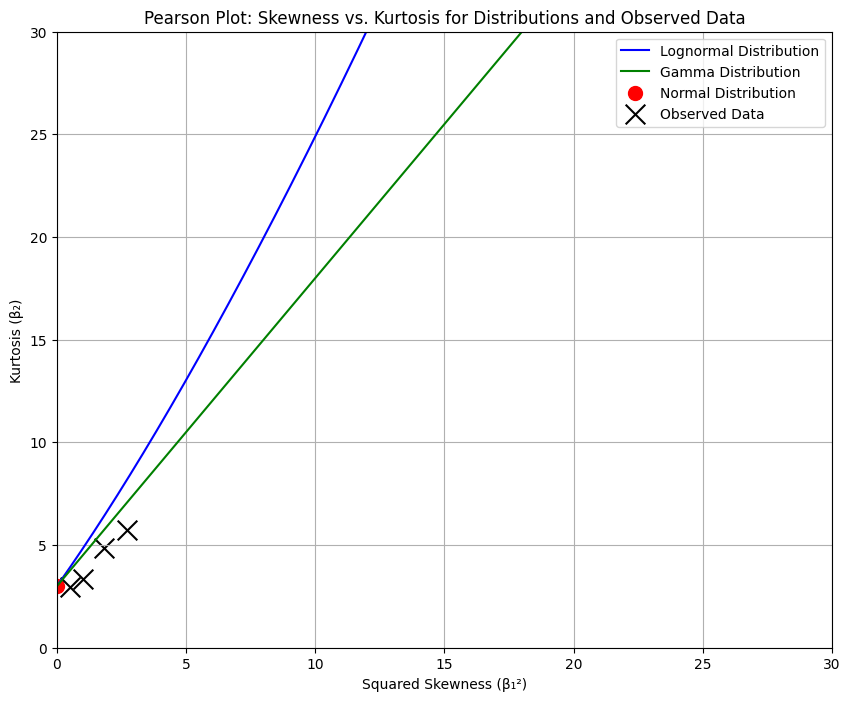

Based on the representation of the observed data in regards to a normal, lognormal, and gamma distribution, we conlude the lognormal distribution is most similar to the bedding plane distances.

Therefore, we would reccomend utilizing a lognormal distribution to predict further values with a horizontal translantion of 0.5 to the right.


In [32]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 8))

# Plot theoretical distributions
plt.plot(beta1_squared_lognormal, beta2_lognormal, label='Lognormal Distribution', color='blue')
plt.plot(beta1_squared_gamma, beta2_gamma, label='Gamma Distribution', color='green')
plt.scatter(beta1_squared_normal, beta2_normal, color='red', marker='o', s=100, label='Normal Distribution')

# Plot observed data
plt.scatter(observed_beta1_squared, observed_beta2, color='black', marker='x', s=200, label='Observed Data')

# Add labels and title
plt.xlabel('Squared Skewness (β₁²)')
plt.ylabel('Kurtosis (β₂)')
plt.title('Pearson Plot: Skewness vs. Kurtosis for Distributions and Observed Data')
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 6.0)
plt.ylim(2.0, 6.0)
plt.show()

print("Based on the representation of the observed data in regards to a normal distribution, we can  By observing where the black 'x' markers (observed data) fall relative to the colored lines and the red circle, \n")
print("we can infer which theoretical distribution the bedding plane distances most closely resemble.")

### Question 4.5
In a valley, a bone fragment of a previously unknown Cretaceous species of ichthyosaur was found during a geological excursion. To search for more fragments, you plan to investigate two upstream branches of the river. Branch 1 (larger) has a catchment area of 18 km², while Branch 2 (smaller) has a catchment area of 10 km². Additionally, in 35% of Branch 1’s area marine Cretaceous rocks are exposed, whereas in Branch 2 that figure is 80%. Given these data, estimate the probability that the fossil came from the larger catchment area. Explain any assumptions you make about probabilities and how you handle the likelihood of the fossil being transported from each branch.


In [34]:
# STEP 1 - Import required Libraries
import numpy as np
import math

In [52]:
# STEP 2 - Define Known Variables
Branch_1_area = 18
Branch_2_area = 10
Marine_fraction_Branch_1 = 0.35
Marine_fraction_Branch_2 = 0.80
Total_Area = Branch_1_area + Branch_2_area
print(f"Refer to the variables below\n")
print(f"Branch 1 has an area of {Branch_1_area} km² with a marine fossil fraction of {Marine_fraction_Branch_1}")
print(f"Branch 2 has an area of {Branch_2_area} km² with a marine fossil fraction of {Marine_fraction_Branch_2}")
print(f"The total area of both branches is {Total_Area} km²")

Refer to the variables below

Branch 1 has an area of 18 km² with a marine fossil fraction of 0.35
Branch 2 has an area of 10 km² with a marine fossil fraction of 0.8
The total area of both branches is 28 km²


In [53]:
# STEP 3 - Calculate Prior Probabilities P(A1) and P(A2)
# Probability that a fossil came from Branch 1 based on its area
Branch_1_area_prob = Branch_1_area / Total_area

# Probability that a fossil came from Branch 2 based on its area
Branch_2_area_prob = Branch_2_area / Total_area

print(f"Prior Probability of fossil from Branch 1: {Branch_1_area_prob:.4f}")
print(f"Prior Probability of fossil from Branch 2: {Branch_2_area_prob:.4f}")

# STEP 4 - Calculate the Evidence P(B)
P_B = (P_B_given_A1 * P_A1) + (P_B_given_A2 * P_A2)

print(f"Evidence (Total Probability of Marine Fossil) (P_B): {P_B:.4f}")

# STEP 5 - Calculate the Posterior Probability P(A1|B) using Bayes' Theorem
# P(A1|B) = [P(B|A1) * P(A1)] / P(B)
P_A1_given_B = (P_B_given_A1 * P_A1) / P_B

print(f"\nUsing Bayes' Theorem:")
print(f"The probability that the fossil came from Branch 1, given it is a marine Cretaceous fossil, is: {P_A1_given_B:.4f} or {P_A1_given_B:.1%}")

Prior Probability of fossil from Branch 1: 0.6429
Prior Probability of fossil from Branch 2: 0.3571
Evidence (Total Probability of Marine Fossil) (P_B): 0.5107

Using Bayes' Theorem:
The probability that the fossil came from Branch 1, given it is a marine Cretaceous fossil, is: 0.4406 or 44.1%


### Question 4.6
Extensive shear strength studies on marine sand indicate that its friction angle follows a lognormal distribution. The measured mean value and standard deviation of the log-transformed friction angle are reported as μ<sub>lnφ</sub> = 3.25 and σ<sub>lnφ</sub> = 0.65. Use these parameters to discuss the distribution of friction angles and to compute key statistics (e.g., the mean friction angle in degrees and its confidence intervals) assuming a lognormal model.


In [54]:
# STEP 1 - Import required Libraries
import numpy as np
import math
from scipy.stats import lognorm

# Approach Hints:
# 1. Recall that if X is lognormally distributed, then ln(X) ~ N(mean, std).
# 2. Here, mean = 3.25, std = 0.65 refer to the normal distribution of ln(φ).
# 3. Use scipy.stats.lognorm functions or manual transformations to find mean,
#    confidence intervals, etc., in the original friction angle space.
#
# Example steps:
# shape = sigma_lnphi
# scale = np.exp(mu_lnphi)
# Then lognorm.mean(shape, scale=scale) can give the mean of the distribution in original units.


In [74]:
# STEP 2 - Define the given parameters for the log-transformed friction angle
mu_lnphi = 3.25
sigma_lnphi = 0.65
print(f"Given: Mean of log-transformed friction angle (μlnφ) = {mu_lnphi}")
print(f"Given: Std dev of log-transformed friction angle (σlnφ) = {sigma_lnphi}\n")

# STEP 3 - Calculate the parameters for scipy.stats.lognorm
# In scipy.stats.lognorm, the shape parameter 's' is sigma_lnphi
# The scale parameter 'scale' is exp(mu_lnphi)
shape = sigma_lnphi
scale = np.exp(mu_lnphi)

print(f"Lognormal distribution shape parameter: {shape:.2f}")
print(f"Lognormal distribution scale parameter: {scale:.2f}\n")

# Create the lognormal distribution object
lognormal_dist = lognorm(s=shape, scale=scale) # Correctly define lognormal_dist as the distribution object

# STEP 4 - Compute the mean friction angle in degrees
mean_friction_angle = lognormal_dist.mean() # Get the mean from the distribution object
print(f"Computed Mean Friction Angle: {mean_friction_angle:.2f} degrees\n")

Given: Mean of log-transformed friction angle (μlnφ) = 3.25
Given: Std dev of log-transformed friction angle (σlnφ) = 0.65

Lognormal distribution shape parameter: 0.65
Lognormal distribution scale parameter: 25.79

Computed Mean Friction Angle: 31.86 degrees



In [81]:
# STEP 5 - Compute the confidence intervals for a given confidence
confidence_level_str = input("Enter the confidence level (e.g., 0.95): ")

try:
    confidence_level = float(confidence_level_str)
    # Now, lognormal_dist should be the distribution object after running cell ba72297e
    lower_bound, upper_bound = lognormal_dist.interval(confidence_level)

    print(f"Confidence Interval for Friction Angle (at {confidence_level*100:.0f}% confidence level):")
    print(f"Lower Bound: {lower_bound:.2f} degrees")
    print(f"Upper Bound: {upper_bound:.2f} degrees\n")
except ValueError:
    print(f"Invalid input for confidence level: '{confidence_level_str}'. Please enter a valid number.")

# Make these variables globally accessible for the next cell
# This ensures the discussion cell has the values even if run out of order
global confidence_level, mean_friction_angle, lower_bound, upper_bound, mu_lnphi, sigma_lnphi

Enter the confidence level (e.g., 0.95): 0.9
Confidence Interval for Friction Angle (at 90% confidence level):
Lower Bound: 8.85 degrees
Upper Bound: 75.13 degrees



In [82]:
# STEP 6 - Answer
print(f"Given the porovided parameters μlnφ = {mu_lnphi} and σlnφ = {sigma_lnphi}.")
print("Assuming a lognormal distribution, which is typically right-skewed, reflecting that friction angles are positive values and can have a long tail towards higher values.")
print(f"The calculated mean friction angle is {mean_friction_angle:.2f} degrees, and with {confidence_level*100:.0f}% confidence, the true friction angle is expected to lie between {lower_bound:.2f} and {upper_bound:.2f} degrees.")
print(f"Based on the given range, these values seem correct through probability, however through experience the values are generally expected to fall between 20 to 37 degrees depending on its fines content and particle distribution.")

Given the porovided parameters μlnφ = 3.25 and σlnφ = 0.65.
Assuming a lognormal distribution, which is typically right-skewed, reflecting that friction angles are positive values and can have a long tail towards higher values.
The calculated mean friction angle is 31.86 degrees, and with 90% confidence, the true friction angle is expected to lie between 8.85 and 75.13 degrees.
Based on the given range, these values seem correct through probability, however through experience the values are generally expected to fall between 20 to 37 degrees depending on its fines content and particle distribution.


### Question 4.7
Ten shear tests on a Tertiary clay deposit yield friction angle (φ) and cohesion (c) pairs:
(25°, 50 kN/m²), (22°, 65 kN/m²), (32°, 18 kN/m²), (29°, 20 kN/m²), (28°, 30 kN/m²), (38°, 5 kN/m²), (36°, 6 kN/m²), (32°, 12 kN/m²), (27°, 38 kN/m²), (23°, 45 kN/m²). Investigate whether there is a correlation between friction angle and cohesion. Summarize your findings on the relationship (e.g., positive, negative, or none).


In [85]:
# STEP 1 - Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Approach Hints:
# 1. Store the friction angle and cohesion data in numpy arrays or a pandas DataFrame.
# 2. Plot φ vs. c to visualize potential correlation.
# 3. Calculate Pearson's correlation coefficient using pearsonr or a similar function.
# 4. Interpret whether the correlation is statistically significant and positive/negative.

# Example structure:
# phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
# cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])
# correlation_coefficient, p_value = pearsonr(phi, cohesion)


Friction Angles (φ): [25 22 32 29 28 38 36 32 27 23]
Cohesion (c): [50 65 18 20 30  5  6 12 38 45]




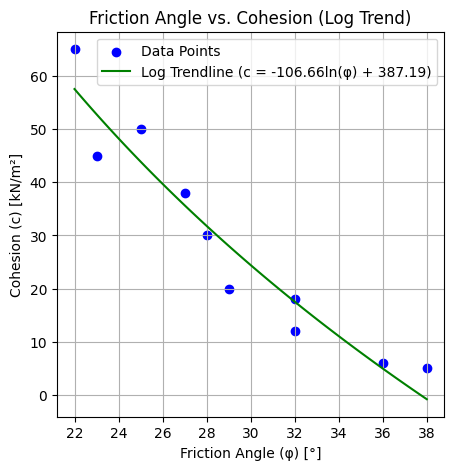

Pearson's Correlation Coefficient (linear): -0.9450
P-value: 0.0000


Based on linear correlation, there is a strong negative linear correlation between friction angle and cohesion (r = -0.95).
The linear correlation is statistically significant at the 5.0% level (p < 0.05).
The logarithmic trendline suggests a non-linear possibly a natural logirithmic relationship, where cohesion decreases as the friction angle increases. Based on my understanding of the cohesion / friction angle interactions, 
our probability and trend appears to be true and follows this general trend but will need to be further analyzed to determine the possible trend line.


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# STEP 2 - Store the friction angle and cohesion data in numpy arrays
phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])

# Display the data
print("Friction Angles (φ):", phi)
print("Cohesion (c):", cohesion)
print("\n")

# STEP 2 - Plot φ vs. c to visualize potential correlation
plt.figure(figsize=(5, 5))
plt.scatter(phi, cohesion, color='blue', label='Data Points')

# Perform logarithmic regression (cohesion = a * log(phi) + b)
# Handle potential non-positive phi values by adding a small constant if necessary, though here all phi are positive.
log_phi = np.log(phi)

# Fit a linear model to log_phi and cohesion
a, b = np.polyfit(log_phi, cohesion, 1)

# Generate points for the log trendline
phi_for_trend = np.linspace(phi.min(), phi.max(), 100)
log_cohesion_trend = a * np.log(phi_for_trend) + b

plt.plot(phi_for_trend, log_cohesion_trend, color='green', label=f'Log Trendline (c = {a:.2f}ln(φ) + {b:.2f})')

plt.title('Friction Angle vs. Cohesion (Log Trend)')
plt.xlabel('Friction Angle (φ) [°]')
plt.ylabel('Cohesion (c) [kN/m²]')
plt.grid(True)
plt.legend()
plt.show()

# STEP 3 - Calculate Pearson's correlation coefficient
# (Note: Pearson's r directly measures linear correlation, so it's kept for the original data)
correlation_coefficient, p_value = pearsonr(phi, cohesion)
print(f"Pearson's Correlation Coefficient (linear): {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

#STEP 4 - Answer
if correlation_coefficient > 0.7:
    relationship = "a strong positive linear correlation"
elif correlation_coefficient > 0.3:
    relationship = "a moderate positive linear correlation"
elif correlation_coefficient < -0.7:
    relationship = "a strong negative linear correlation"
elif correlation_coefficient < -0.3:
    relationship = "a moderate negative linear correlation"
else:
    relationship = "a weak or no linear correlation"
print(f"\n")
print(f"Based on linear correlation, there is {relationship} between friction angle and cohesion (r = {correlation_coefficient:.2f}).")

alpha = 0.05 # Common significance level
if p_value < alpha:
    print(f"The linear correlation is statistically significant at the {alpha*100}% level (p < {alpha}).")
else:
    print(f"The linear correlation is not statistically significant at the {alpha*100}% level (p >= {alpha}).")

print("The logarithmic trendline suggests a non-linear possibly a natural logirithmic relationship, where cohesion decreases as the friction angle increases. Based on my understanding of the cohesion / friction angle interactions, \nour probability and trend appears to be true and follows this general trend but will need to be further analyzed to determine the possible trend line.")

### Question 4.8
Monthly landslide frequency in a mountain region is documented in a histogram (Fig. 4.53). The question is whether there is a cyclic pattern or seasonal trend in landslide occurrence. Outline a method to determine if the observed frequencies are random or exhibit significant seasonality.

In [ ]:
# Hints and Starting Code for Question 4.8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Approach Hints:
# 1. Represent the monthly frequency data in a time series format.
# 2. Use time-series analysis, e.g., seasonal_decompose from statsmodels, to detect seasonality.
# 3. Alternatively, consider hypothesis tests for randomness or periodicity (e.g. autocorrelation plots).
# 4. Visualize the data to check for any repeating patterns across months or seasons.


### Question 4.9
Two boreholes have been drilled on opposite sides of a fault. The objective is to reconstruct the vertical displacement across the fault. Direct markers are lacking, but variations in mean chlorite content (Fig. 4.54) may provide an indirect measure of displacement. Propose a strategy to use cross-correlation of chlorite content profiles to estimate the fault offset. Discuss any assumptions about continuity and variability of the chlorite data in the subsurface.


In [ ]:
# Hints and Starting Code for Question 4.9

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Approach Hints:
# 1. Represent each borehole's chlorite content profile as a 1D series of numeric values at depth intervals.
# 2. Use the scipy.signal.correlate function to compute cross-correlation between the two profiles.
# 3. Identify the lag (depth shift) that maximizes correlation as an estimate of displacement.
# 4. Carefully consider sampling intervals, data resolution, and boundary effects.


### Question 4.10
A medieval copper mine site is being converted into residential housing, and evidence of ancient copper contamination is expected. Sea thrift (Armeria maritima) is an indicator plant for copper, so its presence was recorded along a profile in 20 m × 20 m squares. The observed shoot counts are:  
3, 5, 11, 12, 8, 19, 22, 18, 11, 13  

An experimental semivariogram is to be derived from these data as a preliminary spatial analysis. Outline how you would compute and plot a semivariogram for these shoot counts, and discuss what patterns in spatial variability might imply for copper contamination distribution.


In [ ]:
# Hints and Starting Code for Question 4.10

import numpy as np
import matplotlib.pyplot as plt

# Approach Hints:
# 1. Arrange the shoot counts in spatial order (e.g., as a function of distance along the profile).
# 2. Calculate pairwise distances between measurement points (assuming each square is at intervals of 20 m).
# 3. Compute the semivariogram γ(h) = 0.5 * mean[ (Z(x) - Z(x+h))^2 ] for each distance bin h.
# 4. Plot the semivariogram (γ on the y-axis vs. distance h on the x-axis) to see if there's any spatial structure.
# 5. Look for a sill, range, or nugget effect that might indicate how contamination (and thus sea thrift) is distributed.


# Question 4.11

The following rock sequences are encountered in exploratory drilling:

- Claystone (C)  
- Conglomerate (K)  
- Sandstone (S)  
- Siltstone (U)

(See Table 4.5 for the per-meter breakdown.)

**Task:**  
1. What is the probability that conglomerate (K) will be drilled again in the *next* meter of drilling?  
2. What is the probability that conglomerate will be drilled again in the *next-but-one* meter of drilling?

You may assume that the encountered rock types can be treated as sequential observations of a Markov process or using simpler independence assumptions (depending on your interpretation of the problem’s statement).

In [ ]:
# Use this cell to start setting up your approach in Python.
# Possible steps:
# 1. Represent the rock sequences as a list or array.
# 2. Construct transition probabilities from the data if needed.
# 3. Calculate probabilities for "next meter" and "next-but-one meter."

import numpy as np

# HINT:
# - If you treat each meter drilled as a step in a Markov chain, you need a 4x4 transition matrix
#   (C, K, S, U) or some simpler approach based on frequencies.
# - Probability that K appears next might come directly from the row in the matrix corresponding
#   to the current rock type.
# - For the 'next-but-one' question, you might multiply transition matrices (e.g., T^2).

# Question 4.12

The following orientation data (dip direction α / dip β) for bedding planes are recorded (n=14):

123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21,  
110/25, 101/25, 133/20, 123/22, 145/25, 126/24

**Task:**  
1. Determine the mean resultant length.  
2. Determine the dip direction and dip of the mean vector.  
3. Determine the spherical standard deviation and the spherical confidence interval of the mean vector for an error probability of α = 0.1.

In [ ]:
# Use this cell to load and process the orientation data.
# HINT:
# 1. Convert the dip direction/dip pairs into unit vectors in 3D space.
# 2. Sum these vectors, and derive the resultant direction and magnitude.
# 3. Calculate relevant statistics (standard deviation, confidence intervals) on a sphere.

import numpy as np

# Example structure:
# data = [(123,25), (147,22), (120,24), ...]
# Then convert each (alpha, beta) to x,y,z components on the unit sphere.
# Summation and geometry yield the mean vector direction and length.
#
# You might consider using spherical to Cartesian conversions:
# x = cos(dip) * sin(direction)
# y = cos(dip) * cos(direction)
# z = sin(dip)
# (in radians)